In [2]:
%matplotlib inline

import os
import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import ast
#Built-in module from FMA
import utils


In [3]:
df = pd.read_csv('tracks_supervised.csv', index_col='track_id')
df.head()

acousticness  danceability    energy  instrumentalness  liveness  \
track_id                                                                     
2             0.416675      0.675894  0.634476          0.010628  0.177647   
3             0.374408      0.528643  0.817461          0.001851  0.105880   
5             0.043567      0.745566  0.701470          0.000697  0.373143   
10            0.951670      0.658179  0.924525          0.965427  0.115474   
134           0.452217      0.513238  0.560410          0.019443  0.096567   

          speechiness    tempo   valence  year_released                 album  \
track_id                                                                        
2            0.159310  165.922  0.576661         2009.0  AWOL - A Way Of Life   
3            0.461818  126.957  0.269240         2009.0  AWOL - A Way Of Life   
5            0.124595  100.260  0.621661         2009.0  AWOL - A Way Of Life   
10           0.032985  111.562  0.963590         2008.0     Constant Hitmaker   
134          0.525519  114.290  0.894072         2009.0  AWOL - A Way Of Life   

          album_id  artist_id     artist genres_top genres_all_id  \
track_id                                                            
2                1          1       AWOL    Hip-Hop          [21]   
3                1          1       AWOL    Hip-Hop          [21]   
5                1          1       AWOL    Hip-Hop          [21]   
10               6          6  Kurt Vile        Pop          [10]   
134              1          1       AWOL    Hip-Hop          [21]   

                 track  duration   genres_all  
track_id                                       
2                 Food     168.0  ['Hip-Hop']  
3         Electric Ave     237.0  ['Hip-Hop']  
5           This World     206.0  ['Hip-Hop']  
10             Freeway     161.0      ['Pop']  
134       Street Music     207.0  ['Hip-Hop']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 2 to 124911
Data columns (total 18 columns):
acousticness        13129 non-null float64
danceability        13129 non-null float64
energy              13129 non-null float64
instrumentalness    13129 non-null float64
liveness            13129 non-null float64
speechiness         13129 non-null float64
tempo               13129 non-null float64
valence             13129 non-null float64
year_released       13129 non-null float64
album               13129 non-null object
album_id            13129 non-null int64
artist_id           13129 non-null int64
artist              13129 non-null object
genres_top          13129 non-null object
genres_all_id       13129 non-null object
track               13128 non-null object
duration            13129 non-null float64
genres_all          13129 non-null object
dtypes: float64(10), int64(2), object(6)
memory usage: 1.9+ MB


In [5]:
df.head()

acousticness  danceability    energy  instrumentalness  liveness  \
track_id                                                                     
2             0.416675      0.675894  0.634476          0.010628  0.177647   
3             0.374408      0.528643  0.817461          0.001851  0.105880   
5             0.043567      0.745566  0.701470          0.000697  0.373143   
10            0.951670      0.658179  0.924525          0.965427  0.115474   
134           0.452217      0.513238  0.560410          0.019443  0.096567   

          speechiness    tempo   valence  year_released                 album  \
track_id                                                                        
2            0.159310  165.922  0.576661         2009.0  AWOL - A Way Of Life   
3            0.461818  126.957  0.269240         2009.0  AWOL - A Way Of Life   
5            0.124595  100.260  0.621661         2009.0  AWOL - A Way Of Life   
10           0.032985  111.562  0.963590         2008.0     Constant Hitmaker   
134          0.525519  114.290  0.894072         2009.0  AWOL - A Way Of Life   

          album_id  artist_id     artist genres_top genres_all_id  \
track_id                                                            
2                1          1       AWOL    Hip-Hop          [21]   
3                1          1       AWOL    Hip-Hop          [21]   
5                1          1       AWOL    Hip-Hop          [21]   
10               6          6  Kurt Vile        Pop          [10]   
134              1          1       AWOL    Hip-Hop          [21]   

                 track  duration   genres_all  
track_id                                       
2                 Food     168.0  ['Hip-Hop']  
3         Electric Ave     237.0  ['Hip-Hop']  
5           This World     206.0  ['Hip-Hop']  
10             Freeway     161.0      ['Pop']  
134       Street Music     207.0  ['Hip-Hop']

In [6]:
### Normalize Tempo column

df['tempo'] /= np.max(np.abs(df['tempo']))
df['tempo'].head()

track_id
2      0.660854
3      0.505660
5      0.399328
10     0.444343
134    0.455208
Name: tempo, dtype: float64

In [7]:
### Isolate audio features into one dataframe
audio_cols = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']
audio_features = df[audio_cols]

### Prelude: Definition of Features
Taken from Spotify's site: https://developer.spotify.com/web-api/get-audio-features/

- **acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- **danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- **Energy** is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- **instrumentalness:** Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- **liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- **speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- **tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. The value here is normalized so the max value = 1
- **valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

### Distribution of Features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002797AC32CF8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002797B0A3BE0>]], dtype=object)

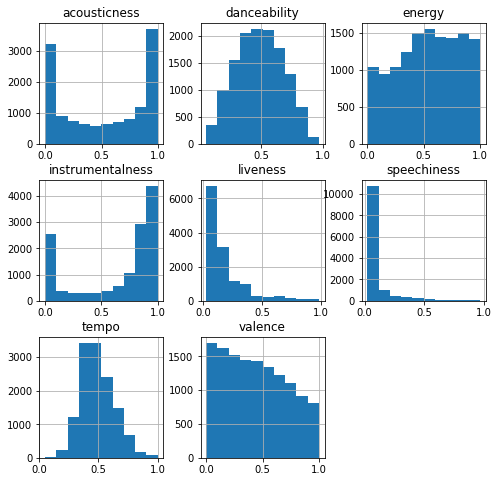

In [8]:
audio_features.hist(figsize=(8,8))


### Quantifying Relationship Between Audio Features
For the sake of this analysis, let's assume that we have a null-hypothesis that states that each audio feature is independent. The alternative hypothesis is that for each audio feature, another audio feature is correlated in some way.

In [9]:
from scipy.stats import pearsonr
import pandas as pd
# Function taken from: https://stackoverflow.com/questions/25571882/pandas-columns-correlation-with-statistical-significance
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

calculate_pvalues(audio_features)

acousticness danceability  energy instrumentalness liveness  \
acousticness                0            0       0                0        0   
danceability                0            0       0                0        0   
energy                      0            0       0           0.7823        0   
instrumentalness            0            0  0.7823                0        0   
liveness                    0            0       0                0        0   
speechiness                 0            0  0.3219                0        0   
tempo                       0            0       0           0.0084    0.386   
valence                     0            0       0                0   0.0404   

                 speechiness   tempo valence  
acousticness               0       0       0  
danceability               0       0       0  
energy                0.3219       0       0  
instrumentalness           0  0.0084       0  
liveness                   0   0.386  0.0404  
speechiness                0  0.0002       0  
tempo                 0.0002       0       0  
valence                    0       0       0

From the p-value matrix above, most of the audio features are related to one another. Out of 28 relationships (8 features * 7 other features)/2, the null-hypothesis can be accepted in 3 relationships if we set our p-value threshold > 0.05. These relationships are:

- energy & instrumentalness
- liveness & tempo
- tempo & energy

### Correlation Between Audio Features

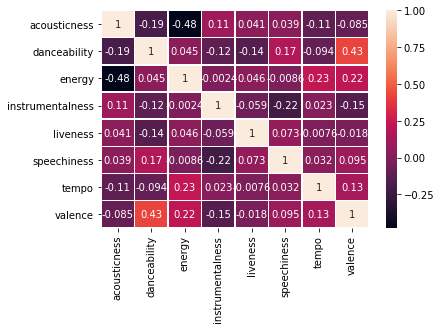

In [10]:
corr = audio_features.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           annot=True,
           linewidth=0.5)
#plt.figure(figsize=[15,15])

In [11]:
corr

acousticness  danceability    energy  instrumentalness  \
acousticness          1.000000     -0.189599 -0.477273          0.110033   
danceability         -0.189599      1.000000  0.045345         -0.118033   
energy               -0.477273      0.045345  1.000000         -0.002412   
instrumentalness      0.110033     -0.118033 -0.002412          1.000000   
liveness              0.041319     -0.143339  0.045752         -0.058593   
speechiness           0.038785      0.171311 -0.008645         -0.216689   
tempo                -0.110701     -0.094352  0.227324          0.023003   
valence              -0.085436      0.428515  0.219384         -0.145200   

                  liveness  speechiness     tempo   valence  
acousticness      0.041319     0.038785 -0.110701 -0.085436  
danceability     -0.143339     0.171311 -0.094352  0.428515  
energy            0.045752    -0.008645  0.227324  0.219384  
instrumentalness -0.058593    -0.216689  0.023003 -0.145200  
liveness          1.000000     0.073104 -0.007566 -0.017886  
speechiness       0.073104     1.000000  0.032188  0.094794  
tempo            -0.007566     0.032188  1.000000  0.129911  
valence          -0.017886     0.094794  0.129911  1.000000

#### Commentary
There's plenty of intuitive observations based on the correlations. 
- Acousticness and energy share the largest negative correlation (-0.48).
- Danceability and valence share the largest positive correlation (0.43)
- Energy and danceability are relatively neutral to each other (0.022)

### Plotting Relationship of Features By Genre (Static)

In [12]:
df.sort_values('genres_top', inplace=True)

In [13]:
n_genres = len(df['genres_top'].unique())

Text(0.5,1,'Energy vs. Acousticness')

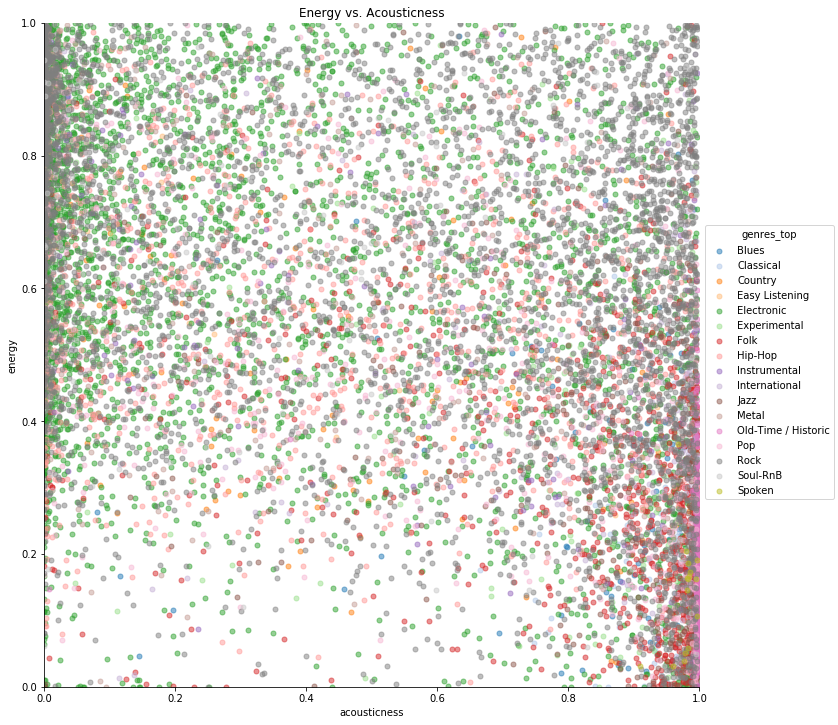

In [14]:
sns.lmplot(data=df, x="acousticness", y="energy", hue="genres_top", palette='tab20',
           fit_reg=False, legend=True, size=10, scatter_kws={'alpha':0.5, 's':25})
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.title("Energy vs. Acousticness")
#sns.set_palette('Set3', n_colors=n_genres)

Text(0.5,1,'Instrumentalness vs. Acousticness')

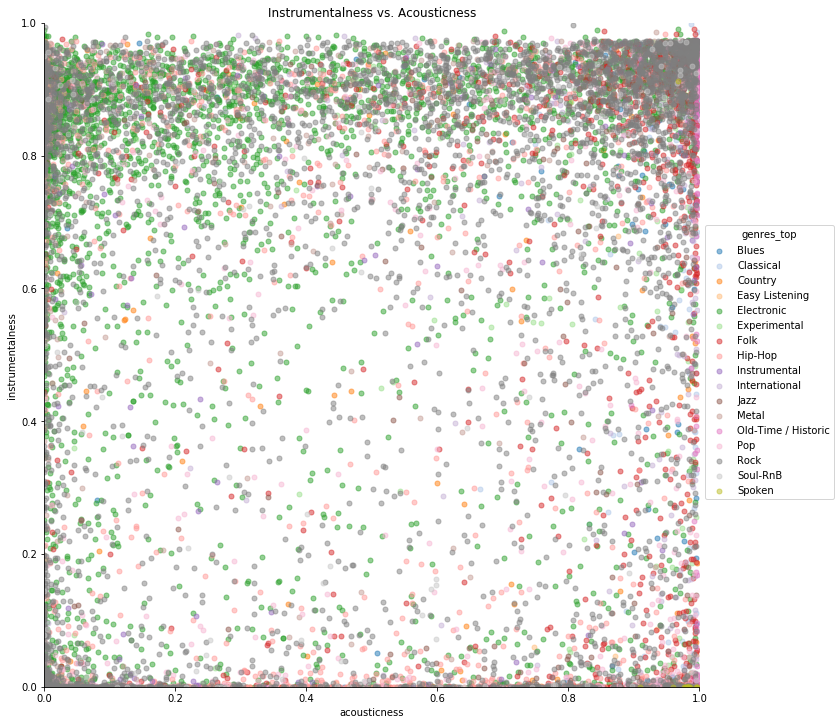

In [15]:
sns.lmplot(data=df, x="acousticness", y="instrumentalness", hue="genres_top", palette="tab20",
           fit_reg=False, legend=True, size=10, 
           scatter_kws={'alpha':0.5, 's':25})
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.title("Instrumentalness vs. Acousticness")

Text(0.5,1,'Tempo vs. Energy')

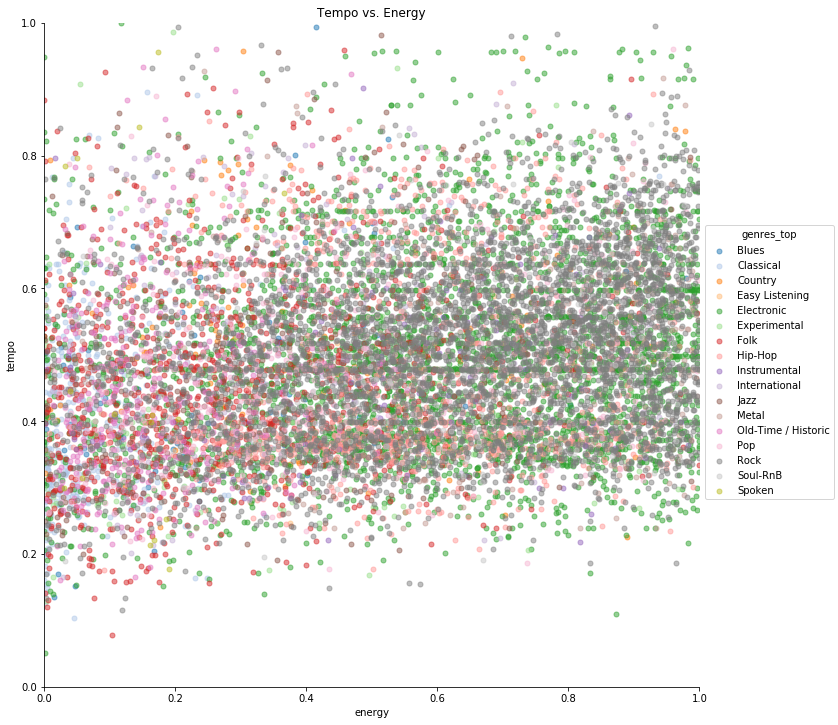

In [16]:
sns.lmplot(data=df, x="energy", y="tempo", hue="genres_top", palette="tab20",
           fit_reg=False, legend=True, size=10,
          scatter_kws={'alpha':0.5, 's':25})
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.title("Tempo vs. Energy")

Text(0.5,1,'Danceability vs. Valence')

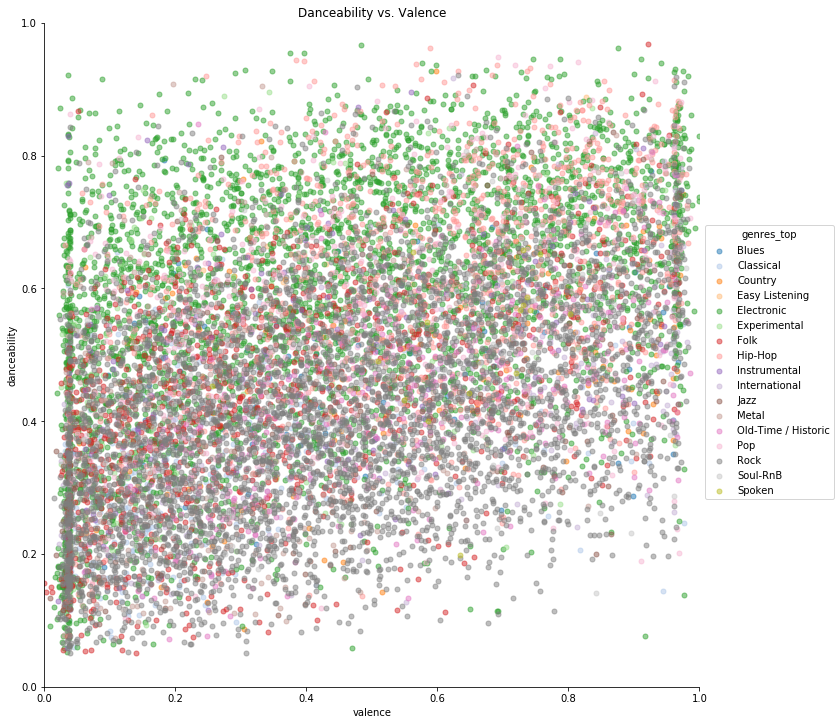

In [17]:
sns.lmplot(data=df, x="valence", y="danceability", hue="genres_top", palette="tab20",
           fit_reg=False, legend=True, size=10,
          scatter_kws={'alpha':0.5, 's':25})
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.title("Danceability vs. Valence")

Text(0.5,1,'Instrumentalness vs. Energy')

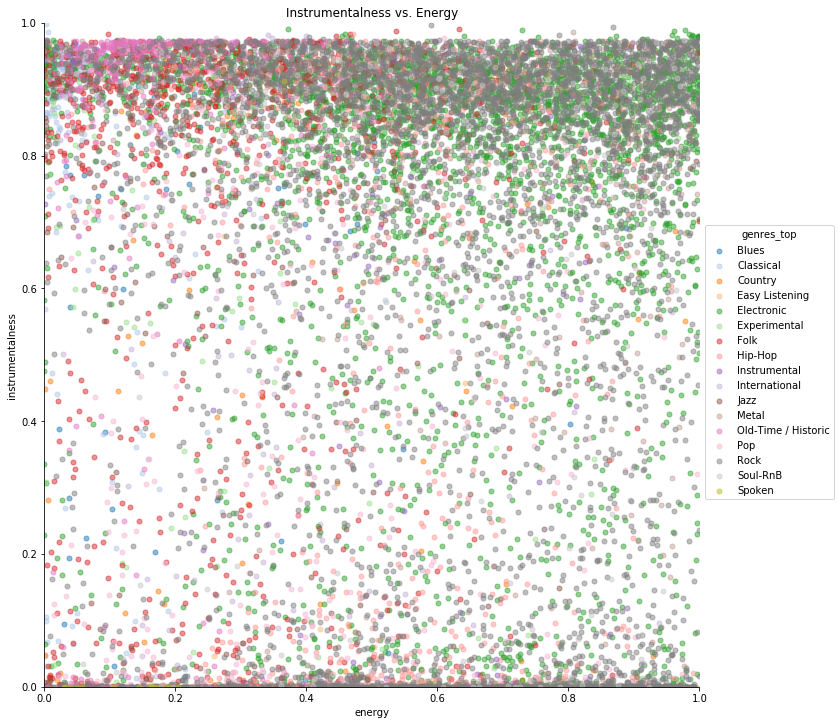

In [18]:
sns.lmplot(data=df, x="energy", y="instrumentalness", hue="genres_top", palette="tab20",
           fit_reg=False, legend=True, size=10, 
          scatter_kws={'alpha':0.5, 's':25})
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.title("Instrumentalness vs. Energy")

Text(0.5,1,'Valence vs. Energy')

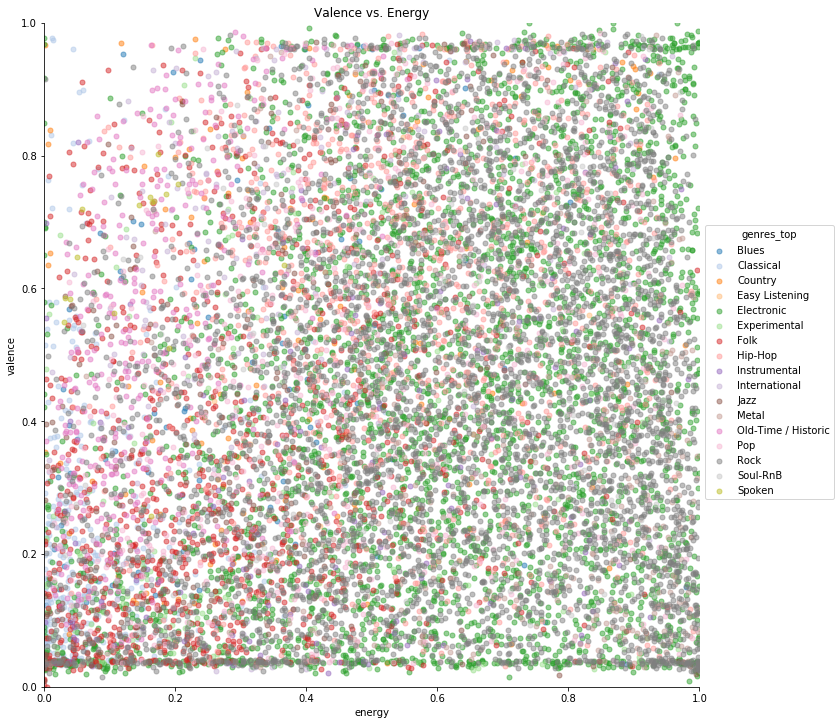

In [19]:
sns.lmplot(data=df, x="energy", y="valence", hue="genres_top", palette="tab20",
           fit_reg=False, legend=True, size=10, 
          scatter_kws={'alpha':0.5, 's':25})
plt.xlim(0,1.0)
plt.ylim(0,1.0)
plt.title("Valence vs. Energy")

#### Plotting each track is messy!
It would probably be better to group these features by the average of each genre. 

### Plotting Audio Features by Genre

Below are just some pairings of audio features plotted against each other by genre

In [22]:
genre_groupby = df.drop(['year_released', 'duration', 'artist_id', 'album_id'], axis=1).groupby('genres_top').agg('mean')
genre_groupby.head()
#genre_groupby.to_csv('feature_clusters')
#genre_groupby.corr()

acousticness  danceability    energy  instrumentalness  \
genres_top                                                               
Blues               0.825582      0.475235  0.307554          0.534776   
Classical           0.976855      0.316005  0.087507          0.752226   
Country             0.605171      0.486435  0.428365          0.480032   
Easy Listening      0.447315      0.654174  0.512658          0.202221   
Electronic          0.349586      0.583794  0.606626          0.719687   

                liveness  speechiness     tempo   valence  
genres_top                                                 
Blues           0.170920     0.080796  0.448852  0.471891  
Classical       0.222520     0.051567  0.410877  0.240054  
Country         0.157157     0.097682  0.515850  0.533178  
Easy Listening  0.166075     0.041499  0.452140  0.541020  
Electronic      0.171622     0.114541  0.495309  0.436835

#### Correlation of features based on mean features by genre

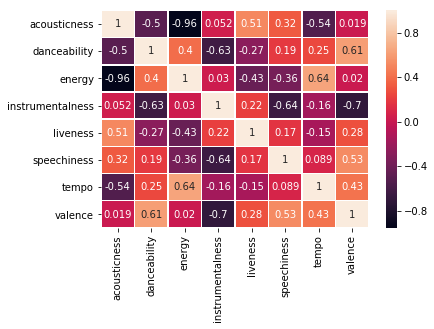

In [23]:
corr = genre_groupby.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           annot=True,
           linewidth=0.5)

Text(0.5,1,'acousticness vs. energy')

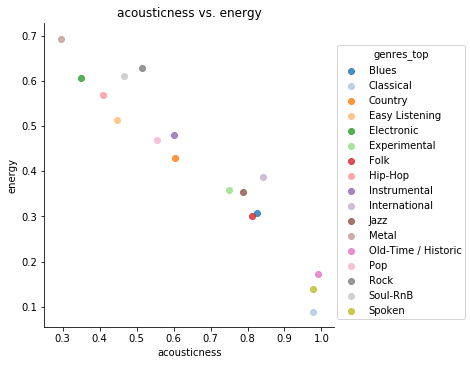

In [24]:
#High negative R

sns.lmplot(data=genre_groupby.reset_index(), x="acousticness", y="energy", hue='genres_top', palette="tab20", fit_reg=False)
plt.title('acousticness vs. energy')


- Hip-hop is the most energetic and also the least acoustic
- On the opposite end are Pop, Spoken Word, and Soul-RnB
- Most genres are clustered between energy levels 0.3-0.6 and acousticness levels 0.4-0.9
- Some genres are very close to each other. Folk and Blues are nearly identical in acousticness and energy. 

Text(0.5,1,'instrumentalness vs. valence')

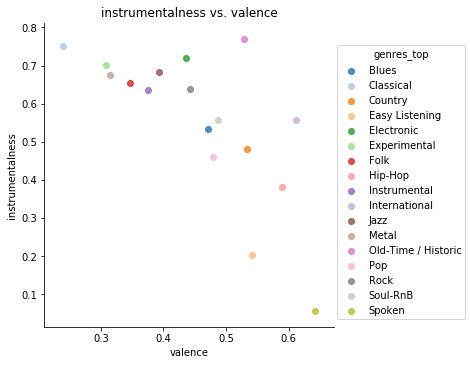

In [25]:
#High negative R

sns.lmplot(data=genre_groupby.reset_index(), x="valence", y="instrumentalness", hue='genres_top', palette="tab20", fit_reg=False)
plt.title('instrumentalness vs. valence')


Text(0.5,1,'valence vs. danceability')

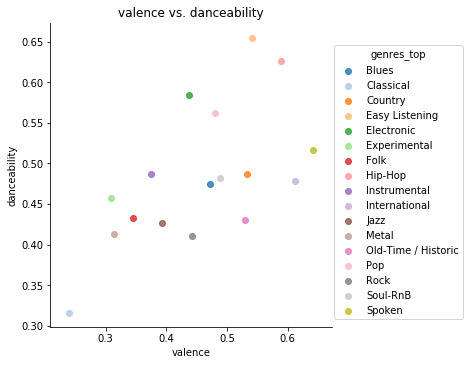

In [26]:
#High positive R


sns.lmplot(data=genre_groupby.reset_index(), x="valence", y="danceability", hue='genres_top', palette="tab20", fit_reg=False)
plt.title('valence vs. danceability')

Text(0.5,1,'tempo vs. energy')

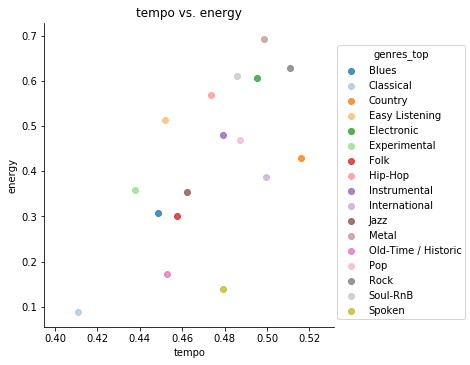

In [27]:
# High Positive R

sns.lmplot(data=genre_groupby.reset_index(), x="tempo", y="energy", hue='genres_top', palette="tab20", fit_reg=False)
plt.title('tempo vs. energy')

Text(0.5,1,'acousticness vs. instrumentalness')

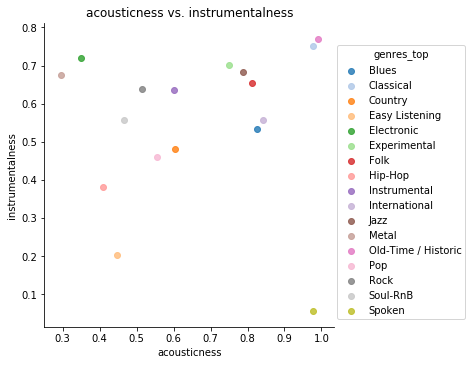

In [28]:
# Neutral R
sns.lmplot(data=genre_groupby.reset_index(), x="acousticness", y="instrumentalness", hue='genres_top', palette="tab20", fit_reg=False)
plt.title('acousticness vs. instrumentalness')

Text(0.5,1,'acousticness vs. danceability')

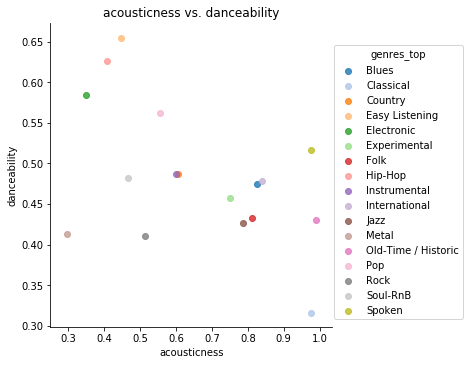

In [29]:
# ~Neutral R
sns.lmplot(data=genre_groupby.reset_index(), x="acousticness", y="danceability", hue='genres_top', palette="tab20", fit_reg=False)
plt.title('acousticness vs. danceability')

Text(0.5,1,'acousticness vs. instrumentalness')

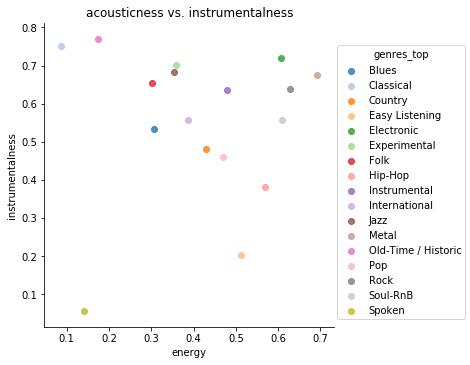

In [30]:
# Neutral R
sns.lmplot(data=genre_groupby.reset_index(), x="energy", y="instrumentalness", hue='genres_top', palette="tab20", fit_reg=False)
plt.title('acousticness vs. instrumentalness')

Text(0.5,1,'tempo vs. energy')

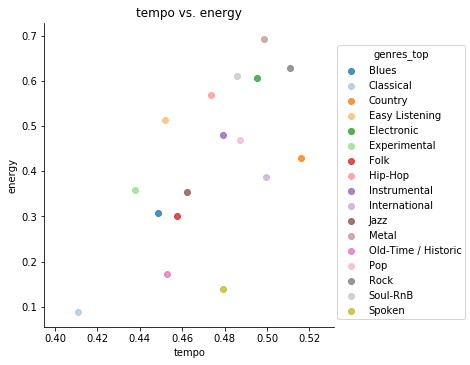

In [31]:
# High Positive R

sns.lmplot(data=genre_groupby.reset_index(), x="tempo", y="energy", hue='genres_top', palette="tab20", fit_reg=False)
plt.title('tempo vs. energy')

## TO DO: Overlay means over track plots
Rough example:

(0, 1.0)

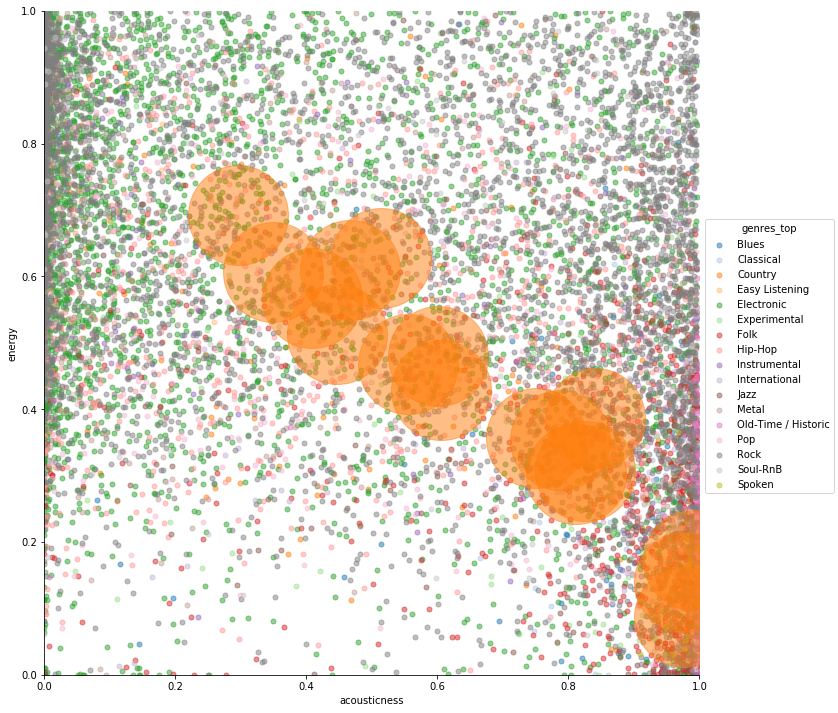

In [32]:
sns.lmplot(data=df, x="acousticness", y="energy", hue="genres_top", palette='tab20',
           fit_reg=False, legend=True, size=10, scatter_kws={'alpha':0.5, 's':25})

df_means = genre_groupby.reset_index()
plt.scatter(x=df_means['acousticness'],y=df_means['energy'],s=10000, alpha=0.5)
plt.xlim(0,1.0)
plt.ylim(0,1.0)
# sns.lmplot(data=genre_groupby.reset_index(), x="acousticness", y="energy", hue="genres_to,p", palette='tab20',
#           fit_reg=False, size=100)
#sns.set_palette('Set3', n_colors=n_genres)

In [33]:
# g = sns.lmplot(data=df, x="acousticness", y="energy", hue="genres_top", palette='tab20',
#            fit_reg=False, legend=True, size=10, scatter_kws={'alpha':0.5, 's':20})
# # g.lmplot(data=df_means, x="acousticness", y="energy", hue="genres_top", palette='tab20',
# #         fit_reg=False, scatter_kws={'alpha':0.7})

## Interactive Plots Using Bokeh

In [31]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, HoverTool, Slider#, CategoricalColorMapper
from bokeh.io import output_notebook, curdoc
from bokeh.layouts import widgetbox, row
#from bokeh.palettes import 

In [32]:
output_notebook()

Loading BokehJS ...

In [33]:
#source = ColumnDataSource(data=dict(zip(df.columns, df.values)))
#source = source.from_df

NameError: name 'source' is not defined

In [ ]:
# p = figure(title='Audio Features', x_axis_label='Feature 1', y_axis_label='Feature 2', x_range = (0,1.0), y_range = (0,1.0),
#            plot_height=400, plot_width=700)

# #           tools=[HoverTool(tooltips='@artist')])
# p.circle(x='acousticness', y='energy', source=source)
# show(p)

In [ ]:
#print(source.column_names)

In [34]:
source = ColumnDataSource(data=df)
unique_genres = df['genres_top'].unique().tolist()
#color_mapper = CategoricalColorMapper(factors=unique_genres, palette=Spectral6)
p = figure(title='Audio Features', x_axis_label='Feature 1', y_axis_label='Feature 2', x_range = (0,1.0), y_range = (0,1.0),
           plot_height=400, plot_width=700)

#           tools=[HoverTool(tooltips='@artist')])
p.circle(x='acousticness', y='energy', source=source, fill_alpha=0.5, legend='genres_top')

#p.legend.location = 'top_right'
show(p)